# Time Series Assignment - Financial Time series Model

### Install pandas-datareader library
In a command window: conda install pandas-datareader if you have not installed it yet.


### Download data
Download the adjusted close price for Facebook (FB.US), 3M (MMM.US), IBM (IBM.US), and Amazon (AMZN.US) using the following code:

In [42]:
#Importing libraries necessary for analysis
import pandas as pd
import numpy as np
import seaborn as sns
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime 
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas.plotting import scatter_matrix
from pylab import pcolor, show, colorbar, xticks, yticks

In [2]:
#importing stock data from yahoo
start = datetime.datetime(2013, 2, 28) 
end = datetime.datetime(2018, 2, 27) 
aapl = web.DataReader('AAPL', 'yahoo', start, end)
intc = web.DataReader('INTC', 'yahoo', start, end)
ebay = web.DataReader('EBAY', 'yahoo', start, end)
amzn = web.DataReader('AMZN', 'yahoo', start, end)

In [3]:
#Formating closing prices columns to be easily identified
aapl = aapl.rename(columns={'Adj Close' : 'AAPLClosingPrice'})
intc = intc.rename(columns={'Adj Close' : 'INTCClosingPrice'})
ebay = ebay.rename(columns={'Adj Close' : 'EBAYClosingPrice'})
amzn = amzn.rename(columns={'Adj Close' : 'AMZNClosingPrice'})

In [4]:
#Concatenating all closing prices (for 4 stocks) as one table
Table = pd.concat([aapl.AAPLClosingPrice,intc.INTCClosingPrice,ebay.EBAYClosingPrice,amzn.AMZNClosingPrice], 
                  axis=1, ignore_index=False)

In [5]:
#Filtering out closing prices based on End of Month time points
TableEoM = Table.groupby(pd.Grouper(freq='BM'))['AAPLClosingPrice','INTCClosingPrice',
                                                'EBAYClosingPrice','AMZNClosingPrice'].mean()

In [6]:
TableEoM.head(5)

,AAPLClosingPrice,INTCClosingPrice,EBAYClosingPrice,AMZNClosingPrice
Date,,,,
2013-02-28,46.861313,17.537090,23.026094,264.269989
2013-03-29,46.908136,18.040610,22.174663,265.758498
2013-04-30,44.564433,18.666755,23.040825,263.072273
2013-05-31,49.051813,20.424195,23.127678,262.727725
2013-06-28,47.357114,20.870562,21.791456,274.102000


### Plotting Autocorrelations

(2 marks) Correctly plot data and identify whether or not it is autocorrelated? Write it your interpretation as a commnet in the code section

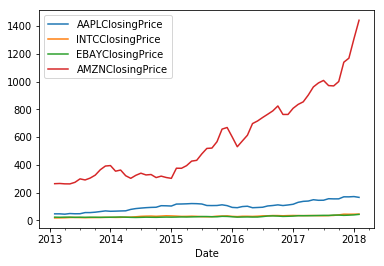

In [7]:
#Time series plot showing end of month closing prices by stock
TableEoM.plot()
pyplot.show()

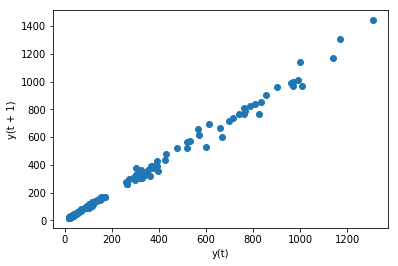

In [8]:
#The lag plot displaying closing price by day, exhibits a linear pattern,thus, confirming the data is 
#strongly non-random and further suggests that an autoregressive model is appropriate.
lag_plot(TableEoM)
pyplot.show()

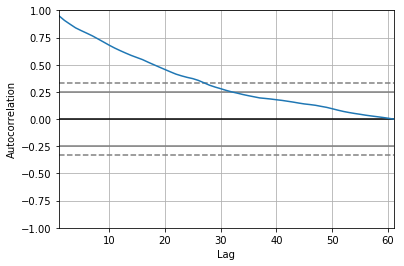

In [47]:
#When all stocks are grouped together, the autocorrelation plot below explains 
#that from periods 0 to 30 are correlated and significant.The datapoints however lose statistical significance past lag 30
pd.plotting.autocorrelation_plot(TableEoM)
pyplot.show()

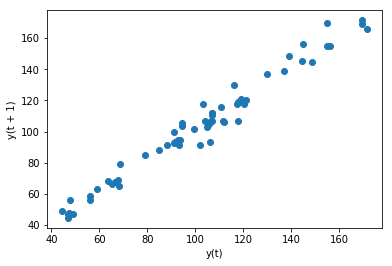

In [10]:
#AAPL stock lag plot exhibits a linear pattern,thus, confirming the data is 
#strongly non-random and further suggests that an autoregressive model is appropriate.
lag_plot(TableEoM.AAPLClosingPrice)
pyplot.show()

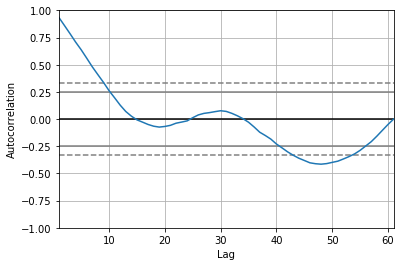

In [11]:
#AAPL closing prices are correlated and significant between lags 1 to 9 and 42 to 53(albeit very low)
pd.plotting.autocorrelation_plot(TableEoM.AAPLClosingPrice)
pyplot.show()

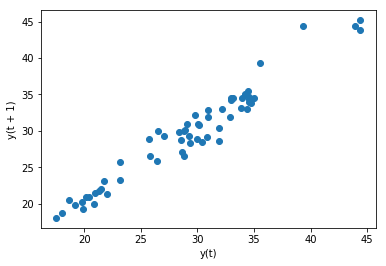

In [12]:
#INTC stock lag plot exhibits a linear pattern,thus, confirming the data is 
#strongly non-random and further suggests that an autoregressive model is appropriate.
lag_plot(TableEoM.INTCClosingPrice)
pyplot.show()

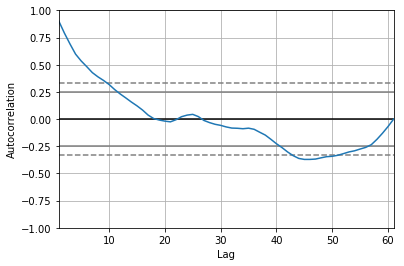

In [13]:
#INTC Closing price is correlated between lags 1 to 11 and 45 to 46(albeit very low)
pd.plotting.autocorrelation_plot(TableEoM.INTCClosingPrice)
pyplot.show()

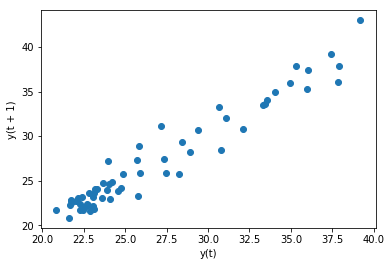

In [14]:
#EBAY stock lag plot exhibits a linear pattern,thus, confirming the data is 
#strongly non-random and further suggests that an autoregressive model is appropriate.
lag_plot(TableEoM.EBAYClosingPrice)
pyplot.show()

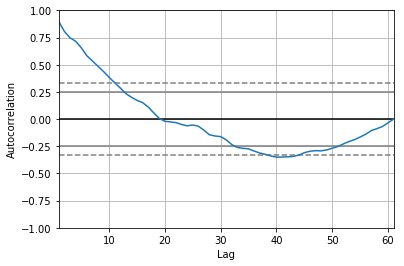

In [15]:
#EBAY closing prices are autocorrelated from lag 1 till lag 10 
pd.plotting.autocorrelation_plot(TableEoM.EBAYClosingPrice)
pyplot.show()

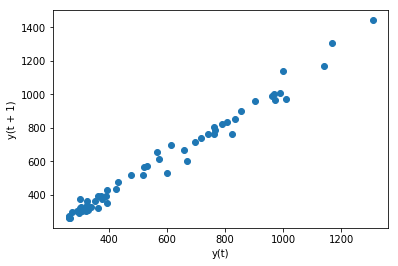

In [16]:
#AMZN stock lag plot exhibits a linear pattern,thus, confirming the data is 
#strongly non-random and further suggests that an autoregressive model is appropriate.
lag_plot(TableEoM.AMZNClosingPrice)
pyplot.show()

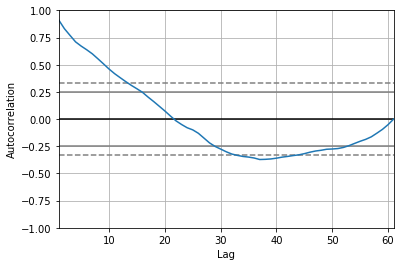

In [17]:
#AMZN closing prices are autocorrelated from lag 1 till lag 12 as well as between 33 and 41(albeit very low)
pd.plotting.autocorrelation_plot(TableEoM.AMZNClosingPrice)
pyplot.show()

### Monthly Returns
(2 marks) Use shift trick to correctly calculate monthly returns 

In [18]:
#Shifting on time period runs a loop on available data to calculate monthly return
(TableEoM/TableEoM.shift(1)-1).dropna().head(5)

,AAPLClosingPrice,INTCClosingPrice,EBAYClosingPrice,AMZNClosingPrice
Date,,,,
2013-03-29,0.000999,0.028712,-0.036977,0.005633
2013-04-30,-0.049964,0.034708,0.039061,-0.010108
2013-05-31,0.100694,0.094148,0.003770,-0.001310
2013-06-28,-0.034549,0.021855,-0.057776,0.043293
2013-07-31,0.008505,-0.046760,0.036544,0.090750


In [19]:
#AAPL stock lag plot exhibits a linear pattern,thus, confirming the data is 
TableReturn = (TableEoM/TableEoM.shift(1)-1).dropna()

In [20]:
TableReturn.sample(5)

,AAPLClosingPrice,INTCClosingPrice,EBAYClosingPrice,AMZNClosingPrice
Date,,,,
2016-01-29,-0.119021,-0.102843,-0.087669,-0.101904
2014-06-30,0.076133,0.110778,-0.036046,0.071362
2016-12-30,0.038471,0.038027,0.033547,-0.000013
2015-02-27,0.137485,-0.048011,0.023062,0.241118
2017-03-31,0.053026,-0.018615,0.004044,0.022130


In [21]:
#Absolute change in prices
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df = TableEoM.diff()[1:].dropna()
df.head(5)

,AAPLClosingPrice,INTCClosingPrice,EBAYClosingPrice,AMZNClosingPrice
Date,,,,
2013-03-29,0.046824,0.503520,-0.851431,1.488509
2013-04-30,-2.343703,0.626145,0.866162,-2.686226
2013-05-31,4.487379,1.757439,0.086853,-0.344548
2013-06-28,-1.694698,0.446368,-1.336222,11.374275
2013-07-31,0.402779,-0.975907,0.796354,24.874819


In [22]:
df.head(5)

,AAPLClosingPrice,INTCClosingPrice,EBAYClosingPrice,AMZNClosingPrice
Date,,,,
2013-03-29,0.046824,0.503520,-0.851431,1.488509
2013-04-30,-2.343703,0.626145,0.866162,-2.686226
2013-05-31,4.487379,1.757439,0.086853,-0.344548
2013-06-28,-1.694698,0.446368,-1.336222,11.374275
2013-07-31,0.402779,-0.975907,0.796354,24.874819


### Plotting Return Correlations
(3 marks) Correctly draw autocorrelation plots, state whether or not they are autocorrelated. In addition, state whether or not monthly returns are correlated among companies (you may use scatter matrix) and find out which companies are the most and the least correlated in terms of their monthly returns. You may use **matplotlib.pyplot.pcolor** for better visualization of the correlation coefficients.

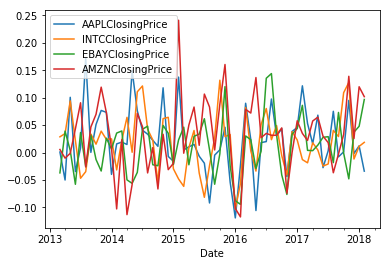

In [23]:
#Time series plot showing monthly returns by stock
TableReturn.plot()
pyplot.show()

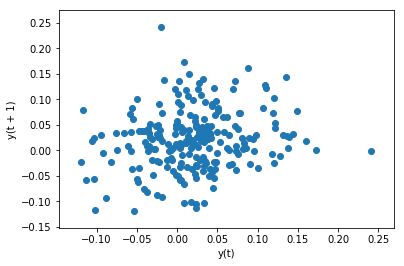

In [24]:
lag_plot(TableReturn)
pyplot.show()

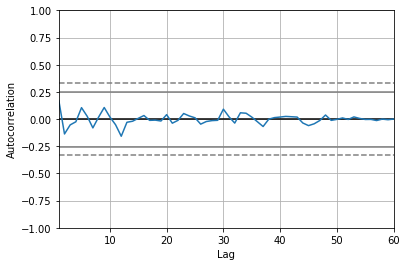

In [25]:
#Autocorrelation of returns grouped as one shows no autocorrelation since autocorrelation lies in the insignificance zone
pd.plotting.autocorrelation_plot(TableReturn)
pyplot.show()

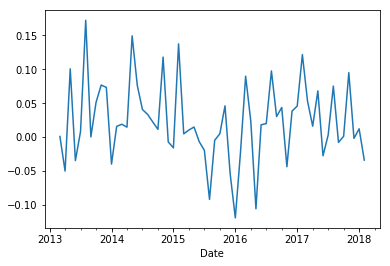

In [26]:
TableReturn.AAPLClosingPrice.plot()
pyplot.show()

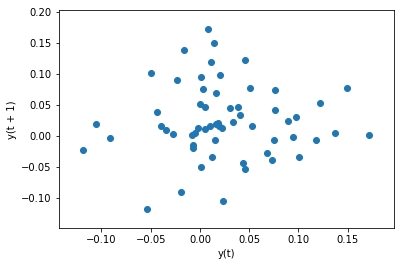

In [27]:
lag_plot(TableReturn.AAPLClosingPrice)
pyplot.show()

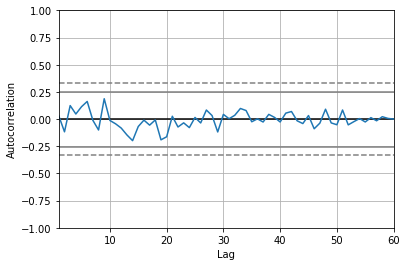

In [28]:
#Autocorrelation ghaphs suggests Apple stock returns are not autocorrelated since it lies in the insignificance zone
pd.plotting.autocorrelation_plot(TableReturn.AAPLClosingPrice)
pyplot.show()

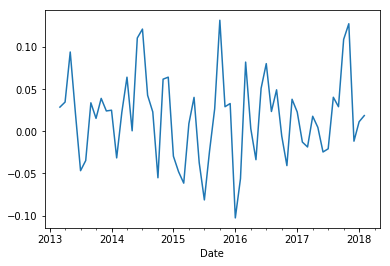

In [29]:
TableReturn.INTCClosingPrice.plot()
pyplot.show()

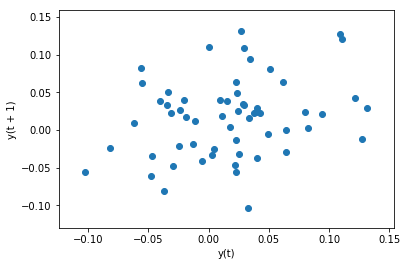

In [30]:
lag_plot(TableReturn.INTCClosingPrice)
pyplot.show()

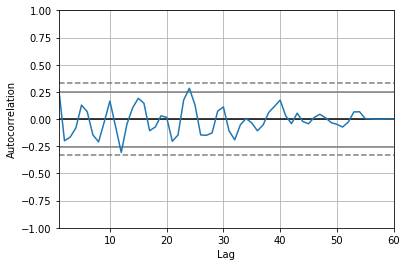

In [31]:
#Autocorrelation ghaphs suggests Apple stock returns are not autocorrelated since it lies in the insignificance zone
pd.plotting.autocorrelation_plot(TableReturn.INTCClosingPrice)
pyplot.show()

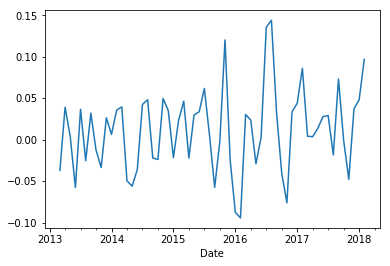

In [32]:
TableReturn.EBAYClosingPrice.plot()
pyplot.show()

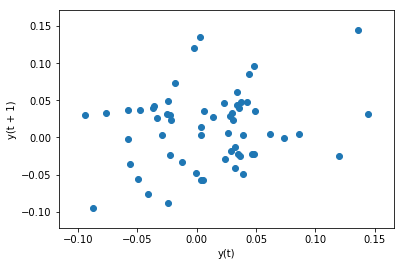

In [33]:
lag_plot(TableReturn.EBAYClosingPrice)
pyplot.show()

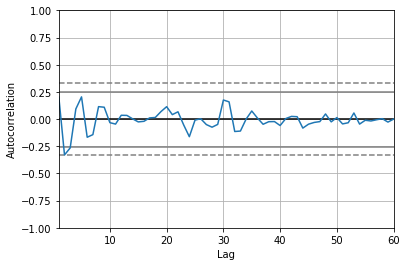

In [34]:
#Autocorrelation ghaphs suggests Apple stock returns are not autocorrelated since it lies in the insignificance zone
pd.plotting.autocorrelation_plot(TableReturn.EBAYClosingPrice)
pyplot.show()

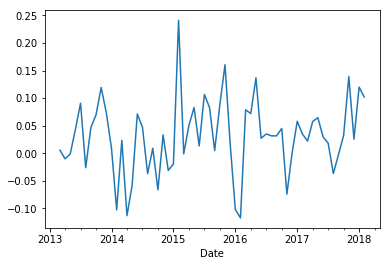

In [35]:
TableReturn.AMZNClosingPrice.plot()
pyplot.show()

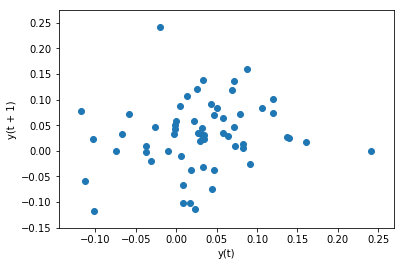

In [36]:
lag_plot(TableReturn.AMZNClosingPrice)
pyplot.show()

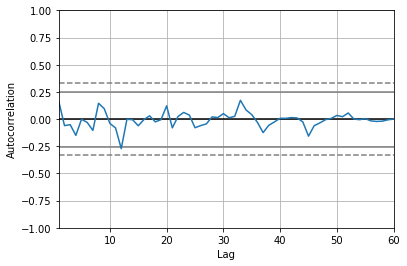

In [37]:
#Autocorrelation ghaphs suggests Apple stock returns are not autocorrelated since it lies in the insignificance zone
pd.plotting.autocorrelation_plot(TableReturn.AMZNClosingPrice)
pyplot.show()

### Bonus


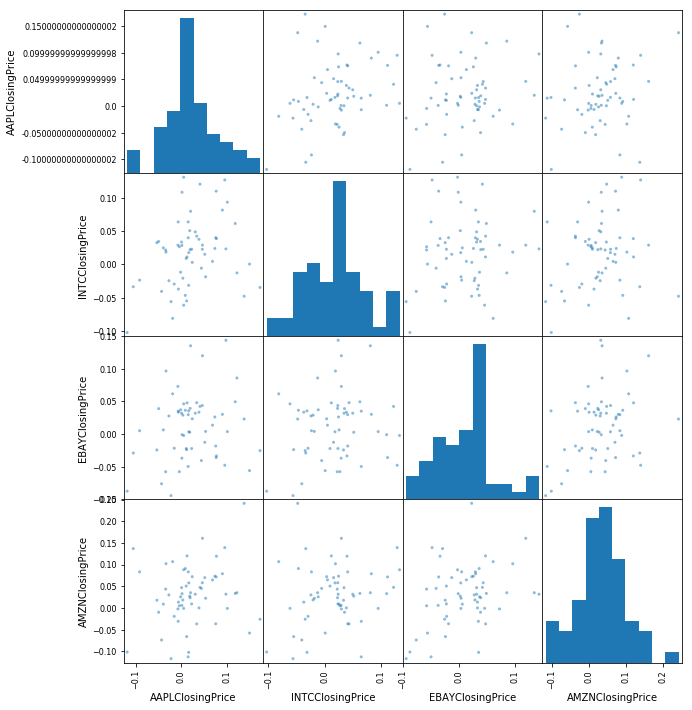

In [38]:
#Data visualization between return of all pairs of stock using scatterplot matrix
scatter_matrix(TableReturn, figsize = (10,12))
pyplot.show()

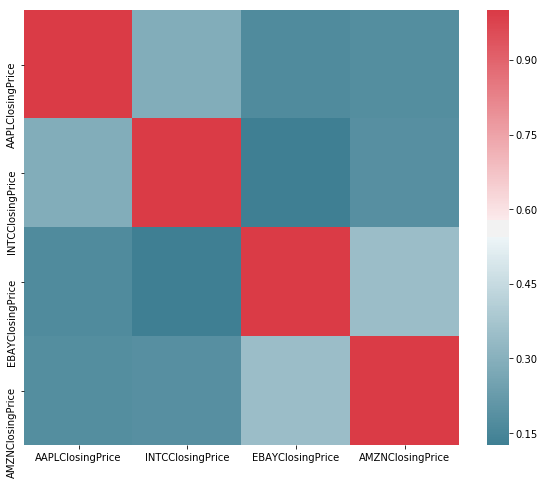

In [48]:
#correlation of the returns of all pairs of stocks
f, ax = pyplot.subplots(figsize=(10, 8))
corr = TableReturn.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
pyplot.show()